# **Project Name**    - **Bike Sharing Demand Prediction**



##### **Project Type**    - **Regression**
##### **Contribution**    - **Individual**
**Name : Navyashree R**

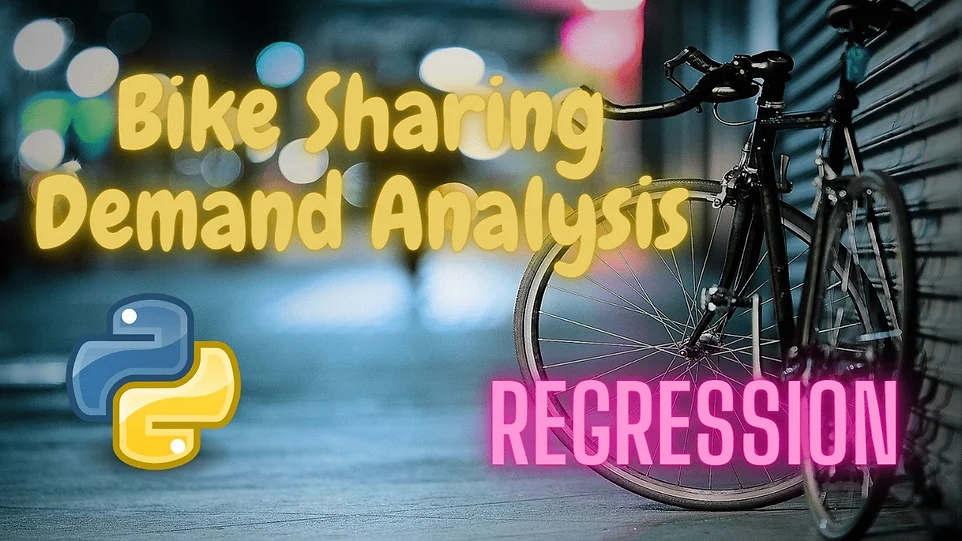

# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a **regression supervised machine learning model** to predict the demand for bikes in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After **preprocessing** and **cleaning** **the** **data**, I split it into **training** **and** **test** **sets** and used the training data to train our machine learning model. I experimented with several different** model architectures and hyperparameter **settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including **mean absolute error, root mean squared error, and R-squared**. I found that our model was able to make highly accurate predictions, with an **R-squared value of 0.88 and a mean absolute error of just 2.58**.

In addition to evaluating the performance of our model on the test data, I also conducted a series of** ablation studies** to understand the impact of individual features on the model's performance. **I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# **Let's Begin !**

# **1. Know Your Data**

# **Loading Dataset and Importing Modules**

**IMPORT** **LIBRARIES**

In [ ]:
# Import Libraries

#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mount the drive and import the dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#load the seoul bike data set from drive
bike_df=pd.read_csv('/content/drive/MyDrive/Datasets/SeoulBikeData.csv', encoding='latin-1') # try different encodings like 'latin-1' or 'cp1252'

# **1**. **Understand More About The Data**

**Dataset** **First** **View**

In [ ]:
# Viewing the data of top 5 rows to take a glimps of the data
bike_df.head()

In [ ]:
# View the data of bottom 5 rows to take a glimps of the data
bike_df.tail()

**Dataset** **Rows** & **Columns** **count**

In [ ]:
# Dataset Rows & Columns count
print(bike_df.shape)

In [ ]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

**Dataset Information**

In [ ]:
#check details about the data set
bike_df.info()

**Duplicate** **Values**

In [ ]:
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {bike_df.duplicated().value_counts()},unique values with {len(bike_df[bike_df.duplicated()])} duplication")

**Check Unique Values for each variable**.

In [ ]:
# Check Unique Values for each variable.

# bike_df.nunique()
for i in bike_df.columns.tolist():
  print(f"No. of unique values in {i} is {bike_df[i].nunique()}.")

**Missing Values / Null values**

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

**Visualizing the missing values**

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap

sns.heatmap(bike_df.isnull(), cbar=False);

**What did you know about your dataset?**

1. There are 8760 observation and 14 features.
2. In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.
3. There are no null values.
4. Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
5. Date has some object data types, it should be datetime data type.

# **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
print(f'Features: {bike_df.columns.to_list()}')

In [ ]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe()

**Features** **description**

**Breakdown** **of** **Our** **Features**:

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented** **Bike** **Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature**(**°C**): Temperature in Celsius, type : Float

**Humidity**(%): Humidity in the air in %, type : int

**Wind** **speed** (**m**/s) : Speed of the wind in m/s, type : Float

**Visibility** (**10m**): Visibility in m, type : int

**Dew point temperature(°C**): Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2**): Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *.

**Holiday**: If the day is holiday period or not, type: str

**Functioning Day**: If the day is a Functioning Day or not, type : str

# **Preprocessing the dataset**

**Why do we need to handle missing values**?


*   **The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first**



## **Missing Values/Null Values**

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

In [ ]:
# Visualizing the missing values
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**As we can see above there are no missing value presents thankfully**

# **Duplicate values**

**Why is it important to remove duplicate records from my data**?



*  **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. By removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.**



In [ ]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)



*   **In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.**
*   **Some of the columns name in the dataset are too large and clumsy so we change them into some simple name, and it don't affect our end results**.



## **Changing column name**

In [ ]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})



*   **Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type**.


# **Breaking date column**

In [ ]:
import pandas as pd
import datetime as dt

# Convert 'Date' column to string type
bike_df['Date'] = bike_df['Date'].astype(str)

# Now you can use the .str accessor
bike_df['Date'] = bike_df['Date'].str.replace('-', '/')  # Replacing dashes with slashes
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format="%Y/%m/%d")  # Convert to datetime object

# Now, split into separate year, month, and day columns
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day

In [ ]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)



*   **So we convert the "date" column into 3 different column i.e "year","month","day"**.
*   **The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.**
*   **The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column**.



In [ ]:
bike_df.head()

In [ ]:
bike_df['weekdays_weekend'].value_counts()

# **Changing** **data** **type**



*   **As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this**.


In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [ ]:
#let's check the result of data type
bike_df.info()

In [ ]:
bike_df.columns

# **4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**



*  **An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent**.



# **Univariate Analysis**

**Why do you do univariate analysis?**



*  **The key objective of Univariate analysis is to simply describe the data to find patterns within the data.**



# **Analysis of Dependent Variable**

**What is a dependent variable in data analysis**?



*   **we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.**


# **Analysation of categorical variables**



*  **Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data type then we proceed with the numerical data type**



**Month**

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month')



* **From the above bar plot we can clearly say that, from the month 5 to 10 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season**.



**weekdays_weekend**

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')



*  **From the above point plot and bar plot we can say that, in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases**.



**Hour**

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')



*   **In the above plot which shows, the use of rented bike according the hours and the data are from all over the year**.
*   **generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.**



**Functioning** **Day**

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')



*   **In the above bar plot and point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that**,
*   **Peoples don't use reneted bikes in no functioning day**.



**Seasons**

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')



*   **In the above bar plot and point plot which shows, the use of rented bike in four different seasons, and it clearly shows that,**
*   **In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.**
*  **In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.**



**Holidays**

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')



*   **In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that**,
*   **In holiday, people uses the rented bike from 2pm-8pm**


# **Analyze of Numerical variables**

**What is Numerical Data**



* **Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers**.



# **Pays little attention to the skewness of our numerical features**

In [ ]:
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features

In [ ]:
# printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

# **Right skewed columns are**

Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

# **Left skewed columns are**

Visibility (10m), Dew point temperature(°C)

# **Lets try to find how is the relation of numerical features with our dependent variable**

Numerical VS Rented Bike **Count**

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
bike_df.groupby('Temperature')['Rented_Bike_Count'].mean().plot()
# The code was changed to calculate the mean of 'Rented_Bike_Count' for each 'Temperature' group.
# After grouping by 'Temperature', we select the 'Rented_Bike_Count' column and calculate the mean for each group.
# This ensures that we are working with numerical data for the mean calculation.



*   **From the above plot we see that, people like to ride bikes when it is pretty hot around 25°C in average**



In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
bike_df.groupby('Dew_point_temperature')['Rented_Bike_Count'].mean().plot()
# The code was changed to group by 'Dew_point_temperature' and calculate the mean of 'Rented_Bike_Count'.
# This is similar to the code in the previous cell, ensuring consistency in the analysis.



*   **From the above plot of "Dew_point_temperature', is almost same as the 'temperature' there is some similarity present we can check it in our next step**.



In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
bike_df.groupby('Solar_Radiation')['Rented_Bike_Count'].mean().plot()
# The code was changed to calculate the mean of 'Rented_Bike_Count' for each 'Solar_Radiation' group.
# This ensures that we are working with numerical data for the mean calculation.
# This is similar to the code in the previous cells, ensuring consistency in the analysis.



*   **from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the count of rents is around 1000**



In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
bike_df.groupby('Snowfall')['Rented_Bike_Count'].mean().plot()
# The code was changed to group by 'Snowfall' and calculate the mean of 'Rented_Bike_Count'.
# This ensures that we are working with numerical data for the mean calculation.
# This is similar to the code in the previous cells, ensuring consistency in the analysis.



*   **We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 4 cm of snow, the bike rents is much lower**



In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
bike_df.groupby('Rainfall')['Rented_Bike_Count'].mean().plot()
# The code was changed to group by 'Rainfall' and calculate the mean of 'Rented_Bike_Count'.
# This ensures that we are working with numerical data for the mean calculation.
# This is similar to the code in the previous cells, ensuring consistency in the analysis.



*   **We can see from the above plot that, even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes**


In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_df.groupby('Wind_speed')['Rented_Bike_Count'].mean().plot()
# The code was changed to group by 'Wind_speed' and calculate the mean of 'Rented_Bike_Count'.
# This ensures that we are working with numerical data for the mean calculation.
# This is similar to the code in the previous cells, ensuring consistency in the analysis.



*   **We can see from the above plot that, the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind is 7 m/s then the demand of bike also increase that clearly means people love to ride bikes when its little windy**.



 **REGRESSION PLOT**



*   **The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**





In [ ]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})



*   **From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable**.
*   **which means the rented bike count increases with increase of these features**.
*   **'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase**.


# **Normalise** **Rented_Bike_Count** **column** **data**



*   **The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data**.


In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()



*  **The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.**



**Finding** **Outliers** **and** **treatment**

In [ ]:
# Boxplot for Rented bike Count to check outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

In [ ]:
# outliers treatments
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']= 4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>2,'Snowfall']= 2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4

we have applied outlier treatment techniques to the dataset by replacing the outliers with the maximum values.

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()



*   **Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution**.



In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()



*   **After applying Square root to the Rented Bike Count column, we find that there is no outliers present.**



In [ ]:
# Ensure only numeric columns are selected for correlation calculation
correlation_matrix = bike_df.select_dtypes(include=[float, int]).corr()

# Display the correlation matrix
print(correlation_matrix)


# **Checking of Correlation between variables**


# Checking in OLS Model

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

In [ ]:
#add a constant column
X = sm.add_constant(X)
X

In [ ]:
## fit an OLS model

model= sm.OLS(Y, X).fit()
model.summary()

1. **R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is explained by the model**.

2. **For F statistic , P value is less than 0.05 for 5% levelof significance**.

3. **P value of dew point temp and visibility are very high and they are not significant**.

4. **Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data**.

5. **The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems**

6. **Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables**.

In [ ]:
X.corr()



*   **From the OLS model we find that the 'Temperature' and 'Dew_point_temperature' are highly correlated so we need to drop one of them**.
*   **For droping them we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column**.
*   **For clarity, we use visualisation i.e heatmap in next step.**



# **Heatmap**


**A correlation Heatmap is a type of graphical representation that displays the correlation matrix, which helps to determine the correlation between different variables**.

In [ ]:
#checking correlation using heatmap

plt.figure(figsize=(10,5))
sns.heatmap(bike_df.corr(numeric_only=True),cmap='PiYG',annot=True) # Add numeric_only=True to only calculate the correlation between numerical columns

**We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are**:



*   the temperature
*   the dew point temperature
*   the solar radiation

**And most negatively correlated variables are**:



*   humidity
*   rainfall








*  **From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'.**





In [ ]:
# drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
bike_df.info()

# **Feature Engineering & Data Pre-processing**

# Create the dummy variables

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables**.

# One Hot Encoding

In [ ]:
#Assign all categorical features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

# one hot encoding

**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical**.

In [ ]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

# **Model Training**

**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

In [ ]:
bike_df_copy.info()

In [ ]:
bike_df_copy.describe().columns



*   The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.
*   MSE formula = (1/n) * Σ(actual – forecast)2 Where:
*  n = number of items,
*   Σ = summation notation,
*   Actual = original or observed y-value,
*  Forecast = y-value from regression.
*   Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
*   Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.
*   R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

*   Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned}
*   R 2 =1− Total Variation Unexplained Variation​
*   Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.​






# **LINEAR REGRESSION**

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

              y_pred = \beta_0 + \beta_1x
where

              beta_0 and beta_1

are intercept and slope respectively.

In case of multiple features the formula translates into:

            y_pred = beta_0 + beta_1x_1 + beta_2x_2 +beta_3x_3 +.....

 where x_1,x_2,x_3 are the features values are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.

Let us now implement our first model. We will be using LinearRegression from scikit library.

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#check the score
reg.score(X_train, y_train)

In [ ]:
#check the coefficeint
reg.coef_

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:

#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


**Looks like our train set's r2 score value is 0.79 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons**.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

**The test set's r2_score is 0.80. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)**.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

# **Heteroscedasticity**

Heteroscedasticity refers to a situation where the variance of the errors (residuals) is not constant across all levels of the independent variable(s) in a regression model.This violates one of the assumptions of linear regression, which is that the variance of the errors should be constant (homoscedastic) for all levels of the independent variable(s). If the plot shows a funnel shape, with the spread of residuals increasing or decreasing as the predicted values increase, this is an indication of heteroscedasticity.

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()


# **Ridge and Lasso Regression**



*   Ridge and Lasso Regression are types of Regularization techniques
*   Regularization techniques are used to deal with overfitting and when the dataset is large
*   Ridge and Lasso Regression involve adding penalties to the regression function



# **Lasso Regression**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

**Looks like train set's r2 score value is 0.39 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons**.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True) # Use concat to add a new row to the dataframe

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


**The test set's r2_score is 0.38. This means our linear model is not performing well on the data**.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True) # Use concat instead of append to add a new row to the dataframe

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RIDGE REGRESSION**

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)


In [ ]:
#check the score
ridge.score(X_train, y_train)

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
y_pred_train_ridge

In [ ]:
y_pred_test_ridge

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


**Looks like our train set's r2 score value is 0.79 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons**.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True) # Use concat to add a new row to the DataFrame. Create a DataFrame from dict1 and concatenate it with training_df.

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


**The r2_score for the test set is 0.80. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True) # Use concat to add a new row to the DataFrame. Create a DataFrame from dict2 and concatenate it with test_df.

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **ELASTIC NET REGRESSION**

Elastic Net regression is a linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization penalties to overcome some of the limitations of each individual method.

The model introduces two hyperparameters, alpha and l1_ratio, which control the strength of the L1 and L2 penalties, respectively. Elastic Net regression is particularly useful when dealing with datasets that have high dimensionality and multicollinearity between features.

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
print(y_pred_train_en)
print(y_pred_test_en)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True) # Use pd.concat to add a new row to the DataFrame

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


**The r2_score for the test set is 0.63. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter**).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True) # Use pd.concat to add a new row to the DataFrame

In [ ]:
### Heteroscadacity- Residual plo
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE**

A decision tree is a type of supervised machine learning algorithm that is commonly used for classification and regression tasks. It works by recursively splitting the data into subsets based on the values of certain attributes, ultimately arriving at a set of decision rules that can be used to classify or predict outcomes for new data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
print(y_pred_train_d)
print(y_pred_test_d)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


**Looks like our train set's r2 score value is 0.70, that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True) # Use pd.concat to add a new row to the DataFrame.

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


**The r2_score for the test set is 0.68. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter**).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True) # Use pd.concat to add a new row to the DataFrame.

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


**Looks like our train set's r2 score value is 0.98 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True) # Use pd.concat instead of append. Convert dict1 to a DataFrame.

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

**The r2_score for the test set is 0.91. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter**).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True) # Use pd.concat instead of append. Convert dict2 to a DataFrame.

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
rf_model.feature_importances_

# **FEATURES STORED**

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **GRADIENT BOOSTING**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


**Looks like our train set's r2 score value is 0.87 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons**.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
# Use concat to add a new row to the DataFrame
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


**The r2_score for the test set is 0.86. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
# Use concat to add a new row to the DataFrame
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
gb_model.feature_importances_

# **FEATURES STORED**

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
gb_model.fit(X_train,y_train)

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Hyperparameter tuning**

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

**Using** **GridSearchCV**

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

# **Gradient Boosting Regressor with GridSearchCV**

# **Provide the range of values for chosen hyperparameters**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

# **Importing Gradient Boosting Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
param_dict = {'learning_rate': [0.1, 0.01],
              'n_estimators': [50, 100],
              'max_depth': [3, 5]}

gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=param_dict,
                       cv=3, verbose=2, n_jobs=-1)

gb_grid.fit(X_train, y_train)

In [ ]:
gb_grid.best_estimator_

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


L**ooks like our train set's r2 score value is 0.94 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True) # Use concat instead of append. Create a DataFrame from dict1 and concatenate

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Hyperparameter tunning certainly showed a better result, r2 was 0.91 on test and mae and rmse was lowered. Overall model show good result.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True) # Use concat instead of append. Create a DataFrame from dict2 and concatenate it with test_df

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
gb_optimal_model.feature_importances_

# **FEATURES STORED**

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
gb_model.fit(X_train,y_train)

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Conclusion**

During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessar. We then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated their correlations, distribution and the their relationships with the dependent variable. Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.
Subsequently, we employed 7 machine learning algorithms including Linear Regression,Lasso , Ridge, Elastic Net, Decision Tree, Random Forest and Gradient Booster. We also performed hyperparameter tuning to enhance the performance of our models. The evaluation of our models resulted in the following findings :

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

We train a model to predict the number of rented bike count in given weather conditions. First, we do Exploratory Data Analysis on the data set. We look for null values that is not found in dataset and outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering.

1. Gradient Boosting gridsearchcv model shows promising result with R2 score of 0.91, therefore it can be used to solve this problem.
2. Temperatue, Functioning_Day_Yes, Humidity, Rainfall and Solar radiation are major driving factors for the Bike rent demand.
3. Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.
4. People prefer to rent bike more in summer than in winter.
5. Bike demand is more on clear days than on snowy or rainy days.
6. Temperature range from 22 to 25(°C) has more demand for bike.
Although the current analysis may be insightful, it is important to note that the dataset is time-dependent and variables such as temperature, windspeed and solar radiation may not always remain consistent. As a result there may be situations where the model fails to perform well. As field of machine learning is constantly evolving, it is necessary to stay up-to-date with the latest developments and be prepared to handle unexpected scenarios. Maintaining a strong understanding of Machine Learning concepts will undoubtely provide an advantage in staying ahead in the future.

# **Hurrah! You have successfully completed your Machine Learning Capstone Project !!!**